In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
import warnings
warnings.filterwarnings("ignore")

In [53]:
df = pd.read_csv("carclaims.csv")

In [4]:
df.tail()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision,Yes
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability,No
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision,Yes
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils,No
15419,Dec,2,Wednesday,Toyota,Urban,Thursday,Dec,3,Male,Single,...,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision,Yes


In [5]:
df.iloc[0]

Month                                 Dec
WeekOfMonth                             5
DayOfWeek                       Wednesday
Make                                Honda
AccidentArea                        Urban
DayOfWeekClaimed                  Tuesday
MonthClaimed                          Jan
WeekOfMonthClaimed                      1
Sex                                Female
MaritalStatus                      Single
Age                                    21
Fault                       Policy Holder
PolicyType              Sport - Liability
VehicleCategory                     Sport
VehiclePrice             more than 69,000
PolicyNumber                            1
RepNumber                              12
Deductible                            300
DriverRating                            1
Days:Policy-Accident         more than 30
Days:Policy-Claim            more than 30
PastNumberOfClaims                   none
AgeOfVehicle                      3 years
AgeOfPolicyHolder                2

In [6]:
df.VehiclePrice.unique()

array(['more than 69,000', '20,000 to 29,000', '30,000 to 39,000',
       'less than 20,000', '40,000 to 59,000', '60,000 to 69,000'],
      dtype=object)

In [7]:
print("Number of Features Available:",df.shape[1])
print("Number of Records Available :",df.shape[0])

Number of Features Available: 33
Number of Records Available : 15420


In [8]:
print("Any missing data?:")
print(df.isnull().sum())

Any missing data?:
Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days:Policy-Accident    0
Days:Policy-Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange-Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
FraudFound              0
dtype: int64


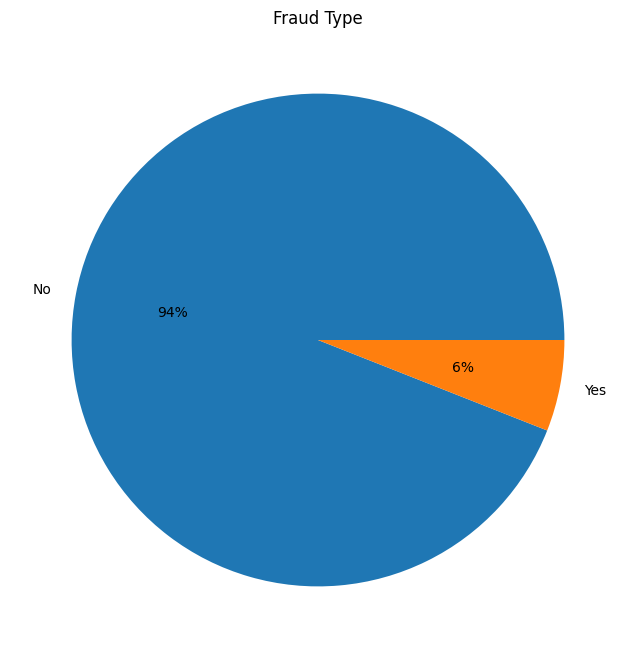

In [9]:
#create pie chart
plt.figure(figsize=(10,8))
plt.pie(df.FraudFound.value_counts().values,labels=df.FraudFound.value_counts().index,  autopct='%.0f%%')
plt.title("Fraud Type")
plt.show()

In [10]:
# Replace the Labels to 0 and 1
df.loc[df['FraudFound'] == 'No','FraudFound'] = 0
df.loc[df['FraudFound'] == 'Yes','FraudFound'] = 1

df['FraudFound'] = df['FraudFound'].astype(int)

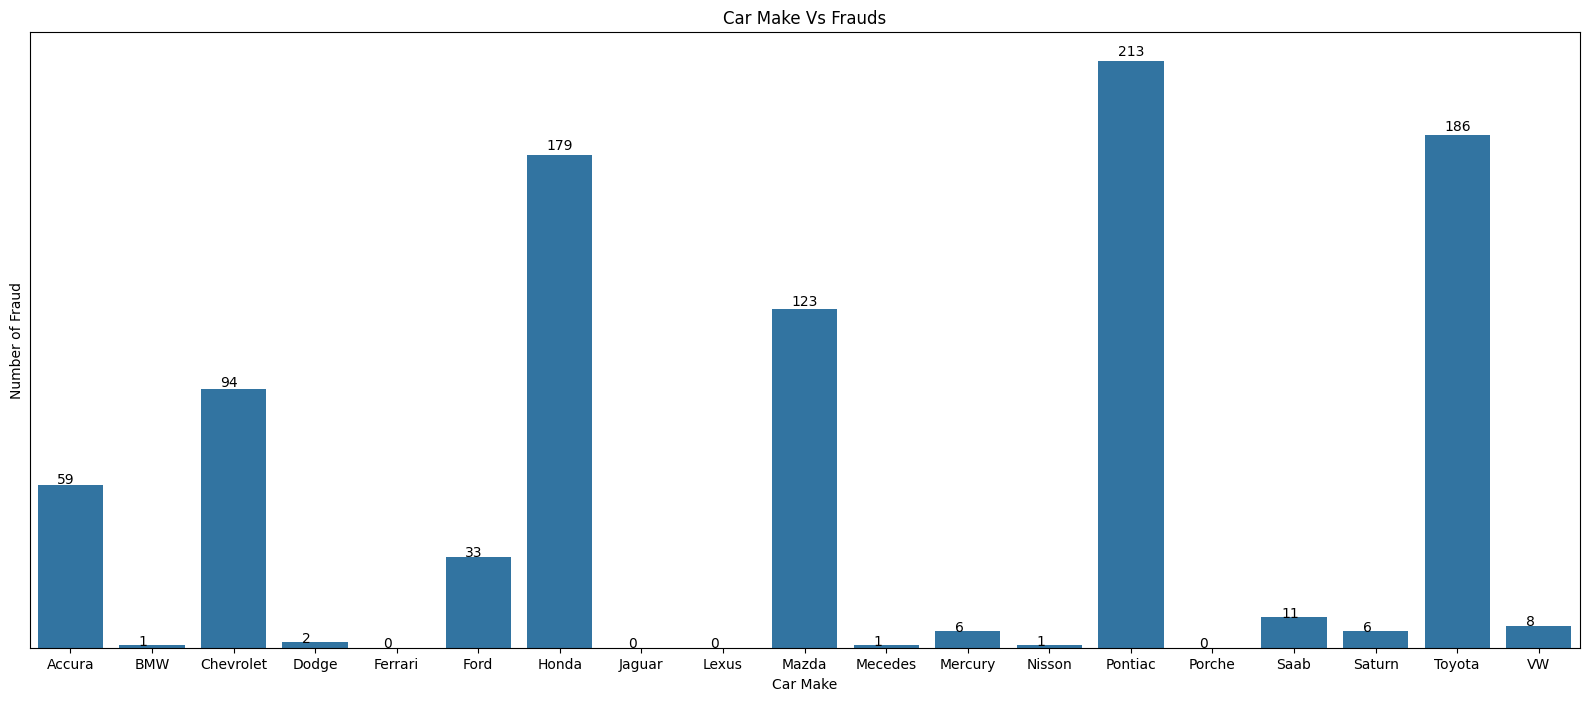

In [11]:
make = df.groupby('Make')['FraudFound'].sum()
plt.figure(figsize=(20,8))
plt.title("Car Make Vs Frauds")

ax = sns.barplot(x=make.index,y=make.values)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x()+0.24, p.get_height()*1.01))
plt.xlabel("Car Make")
plt.ylabel("Number of Fraud");
plt.yticks([])
plt.show()

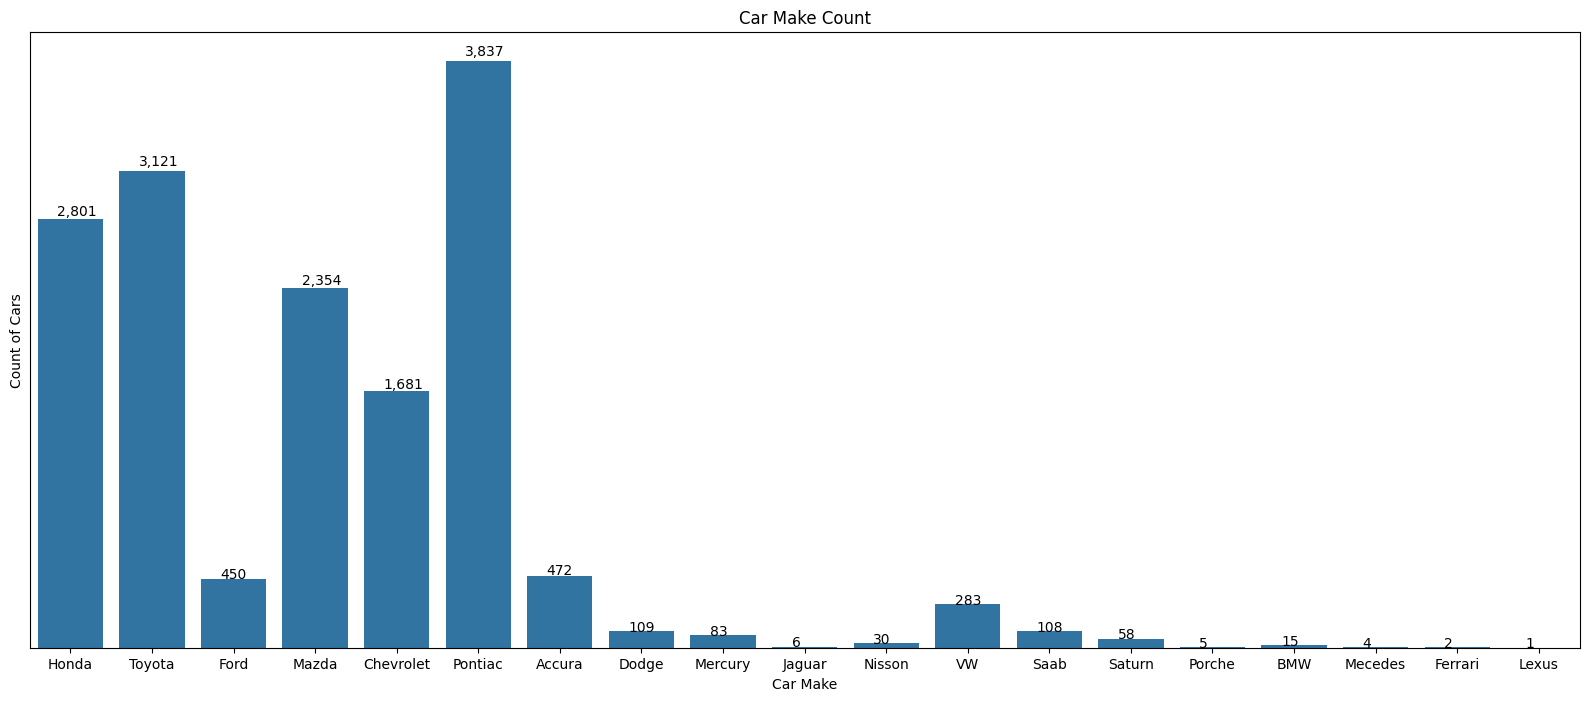

In [12]:
plt.figure(figsize=(20,8))
plt.title("Car Make Count")

ax = sns.countplot(x=df['Make'])
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x()+0.24, p.get_height()*1.01))
plt.xlabel("Car Make")
plt.ylabel("Count of Cars");
plt.yticks([])
plt.show()

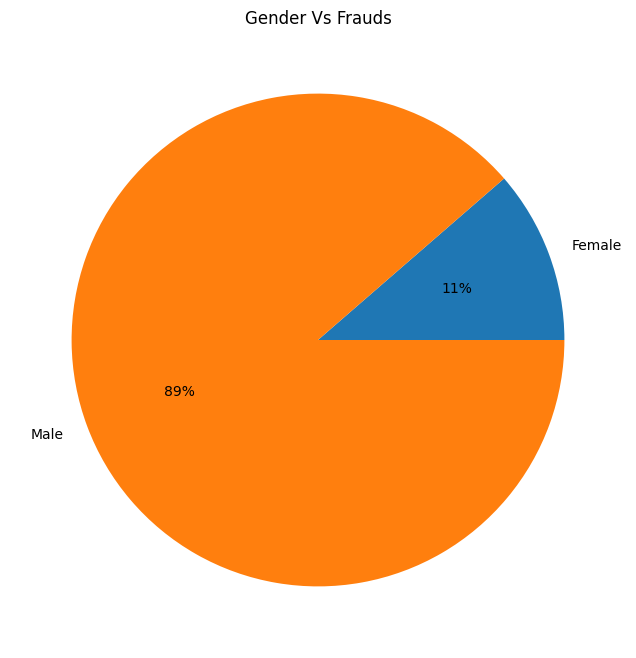

In [13]:
gender = df.groupby('Sex')['FraudFound'].sum()
plt.figure(figsize=(10,8))
plt.title("Gender Vs Frauds")

plt.pie(gender.values,labels=gender.index,  autopct='%.0f%%')

plt.show()

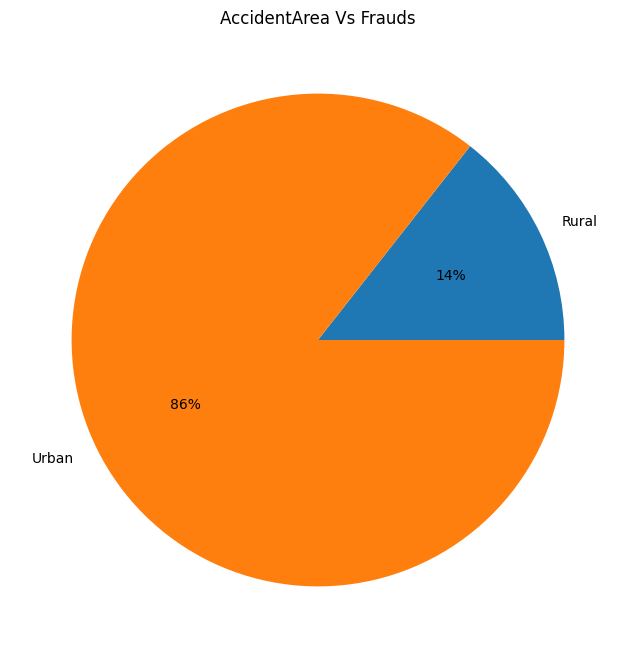

In [14]:
accidentArea = df.groupby('AccidentArea')['FraudFound'].sum()

plt.figure(figsize=(10,8))
plt.title("AccidentArea Vs Frauds")

plt.pie(accidentArea.values,labels=accidentArea.index,  autopct='%.0f%%')

plt.show()

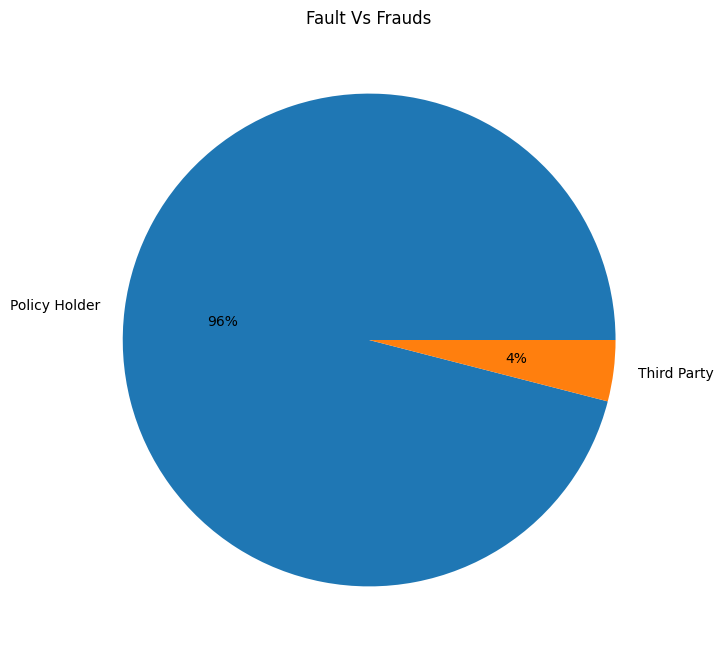

In [15]:
fault = df.groupby('Fault')['FraudFound'].sum()

plt.figure(figsize=(10,8))
plt.title("Fault Vs Frauds")
plt.pie(fault.values,labels=fault.index,  autopct='%.0f%%')
plt.show()

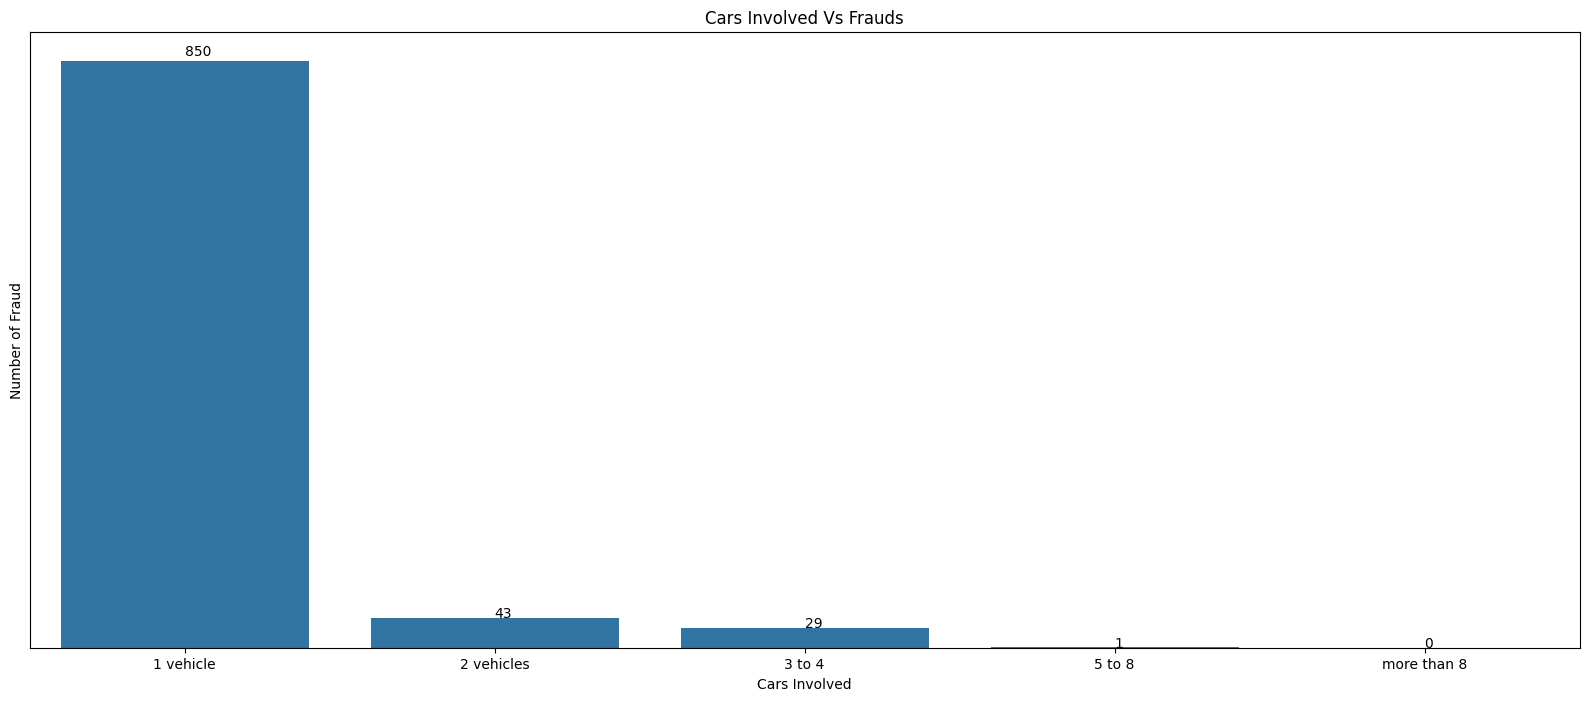

In [16]:

cars = df.groupby('NumberOfCars')['FraudFound'].sum()
plt.figure(figsize=(20,8))
plt.title("Cars Involved Vs Frauds")

ax = sns.barplot(x=cars.index,y=cars.values)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x()+0.4, p.get_height()*1.01))
plt.xlabel("Cars Involved")
plt.ylabel("Number of Fraud");
plt.yticks([])
plt.show()

In [17]:
le = LabelEncoder()

cols = df.select_dtypes('O').columns

df[cols]= df[cols].apply(le.fit_transform)
df['Year'] = le.fit_transform(df.Year)

In [18]:
import joblib

In [19]:
joblib.dump(le, "label_encoder.joblib")

['label_encoder.joblib']

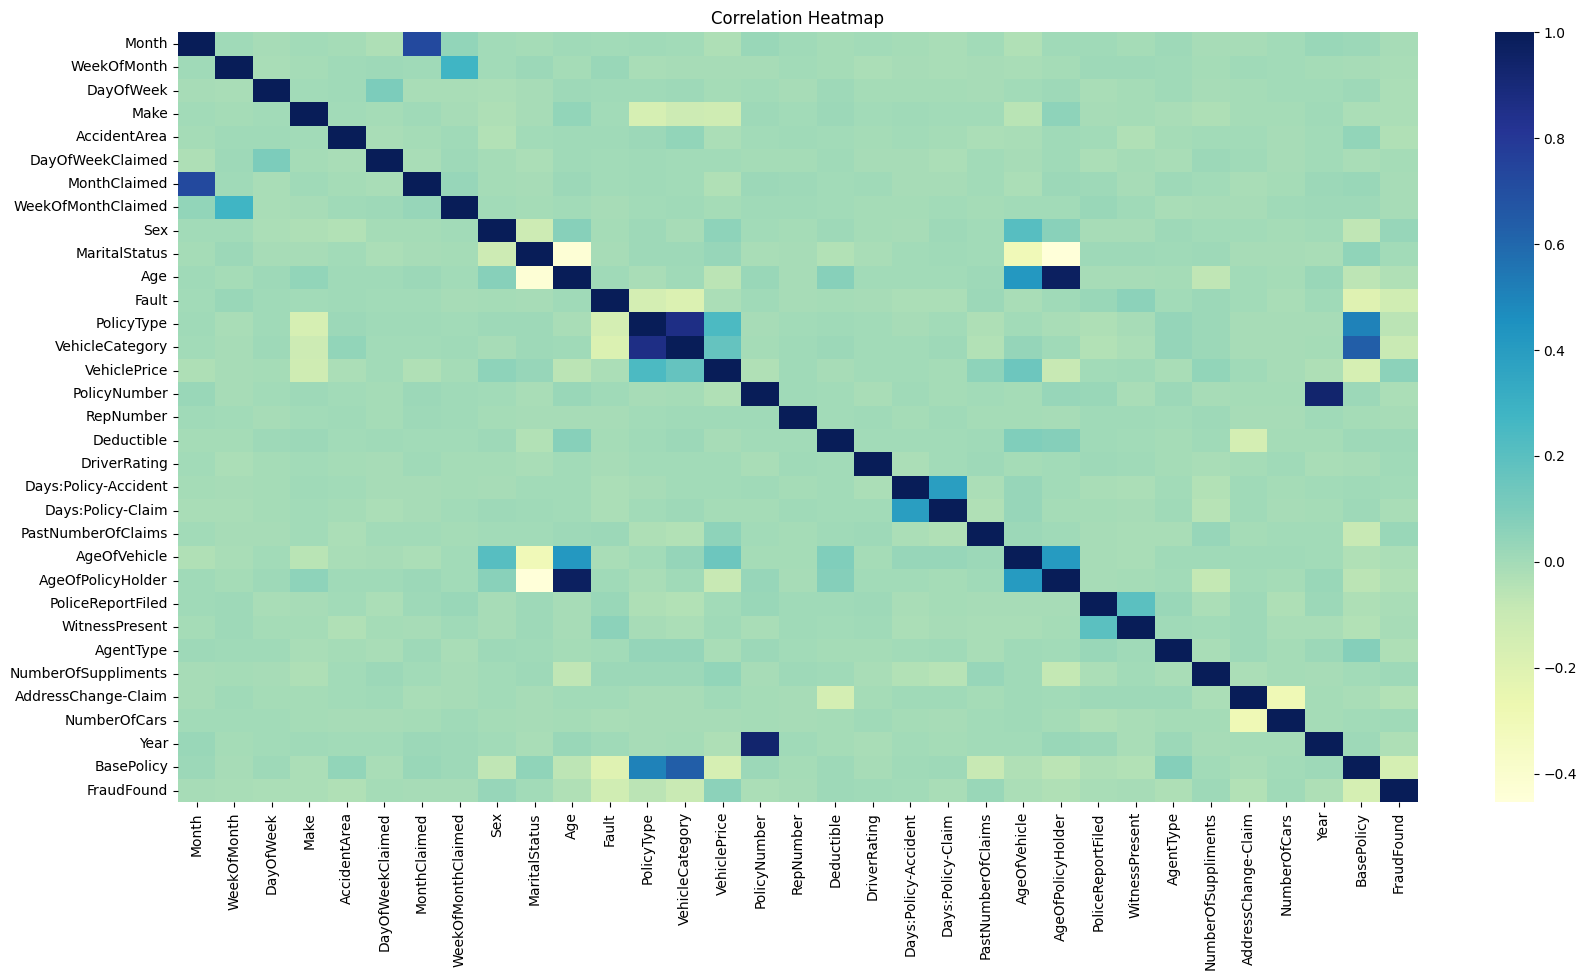

In [20]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

In [54]:
df_new = df[['Make', 'AccidentArea','Sex',\
       'MaritalStatus','Fault', 'VehicleCategory',\
       'VehiclePrice', 'Year',\
       'DriverRating', 'Days:Policy-Accident', 'Days:Policy-Claim',\
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',\
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',\
       'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars',\
       'BasePolicy', 'FraudFound']]

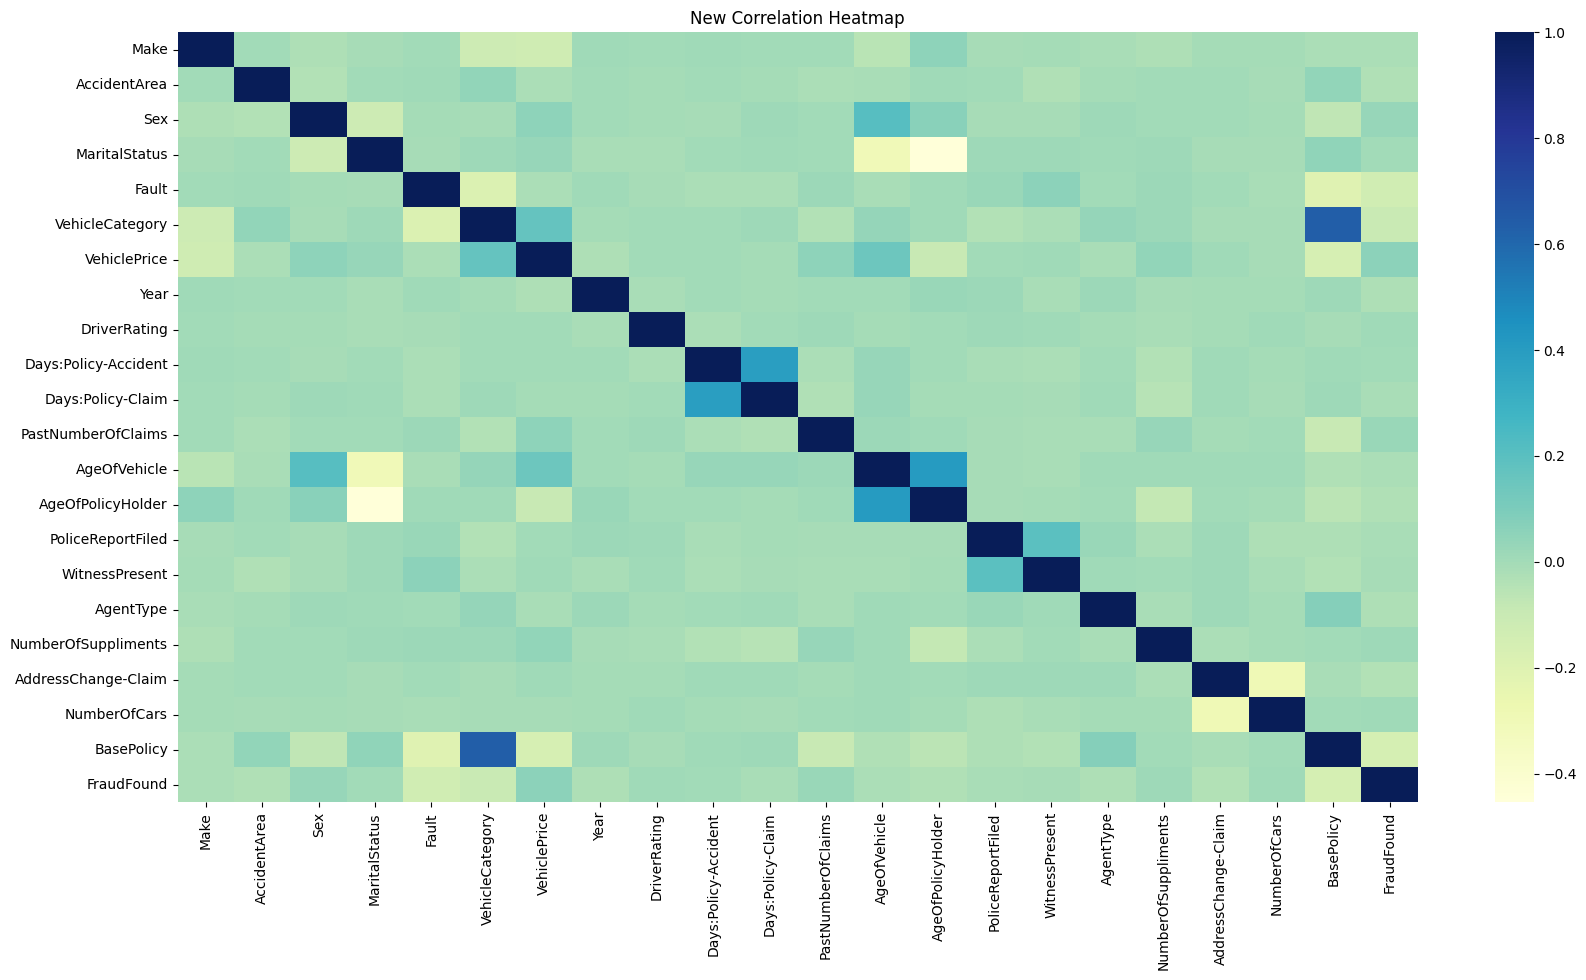

In [22]:
plt.figure(figsize=(20,10))
sns.heatmap(df_new.corr(),cmap="YlGnBu")
plt.title("New Correlation Heatmap")
plt.show()

In [23]:
def conf_matrix(y_test,y_pred):
    con_matrix = confusion_matrix(y_test,y_pred)
    con_matrix = pd.DataFrame(con_matrix,range(2),range(2))

    plt.figure(figsize=(5,5))
    plt.title("Confusion Matrix")
    sns.heatmap(con_matrix,annot=True,cbar=False,fmt='g')

Accuracy of thie model:		 0.9398184176394293


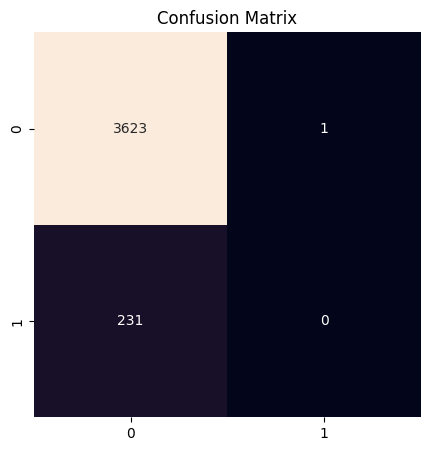

In [25]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

acc_lr=accuracy_score(y_test, lr_pred)
print("Accuracy of thie model:\t\t",acc_lr)
conf_matrix(y_test,lr_pred)

Accuracy of thie model:		 0.9369649805447471


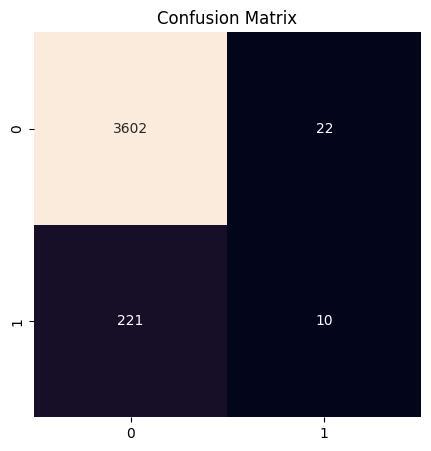

In [26]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)

acc_rfc=accuracy_score(y_test, rfc_pred)
print("Accuracy of thie model:\t\t",acc_rfc)
conf_matrix(y_test,rfc_pred)

In [27]:
def plot_feature_importance(feature_names, importances):
    sorted_indices = importances.argsort()[::-1]
    sorted_importances = importances[sorted_indices]
    sorted_features = [feature_names[i] for i in sorted_indices]

    plt.figure(figsize=(10, 6))
    plt.barh(range(len(sorted_importances)), sorted_importances, align='center')
    plt.yticks(range(len(sorted_importances)), sorted_features)
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('Feature Importance Plot')
    plt.show()

In [46]:
X_train.columns

Index(['Make', 'AccidentArea', 'Sex', 'MaritalStatus', 'Fault',
       'VehicleCategory', 'VehiclePrice', 'Year', 'DriverRating',
       'Days:Policy-Accident', 'Days:Policy-Claim', 'PastNumberOfClaims',
       'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled',
       'WitnessPresent', 'AgentType', 'NumberOfSuppliments',
       'AddressChange-Claim', 'NumberOfCars', 'BasePolicy'],
      dtype='object')

In [47]:
X_train.head()

,Make,AccidentArea,Sex,MaritalStatus,Fault,VehicleCategory,VehiclePrice,Year,DriverRating,Days:Policy-Accident,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,BasePolicy
6965,13,1,1,2,0,1,0,1,3,3,...,1,4,4,0,0,0,3,3,0,2
12899,9,1,1,1,0,0,0,2,4,3,...,1,6,6,0,0,0,3,3,0,0
5358,0,1,1,1,1,0,2,0,1,3,...,3,6,6,0,0,0,3,3,0,1
15371,13,0,1,1,1,0,0,2,4,3,...,0,5,5,0,0,0,2,3,0,1
1717,2,1,1,1,0,0,1,0,1,3,...,0,6,6,0,0,1,0,3,0,1


In [28]:
importances = rfc.feature_importances_

# Plot feature importances



In [31]:
y_train

,FraudFound
6965,0
12899,0
5358,0
15371,0
1717,0
...,...
13770,0
14984,0
1663,0
11502,0


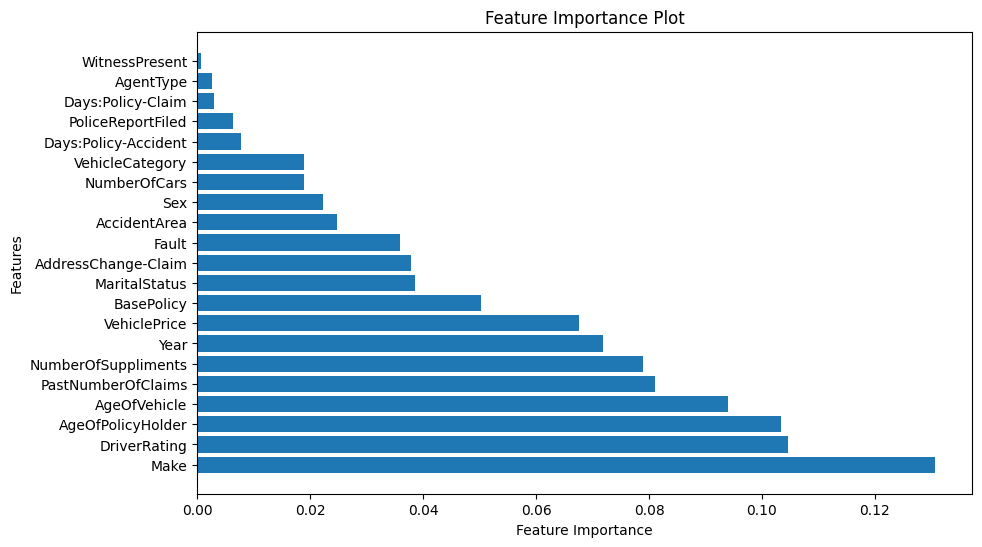

In [30]:
plot_feature_importance(X_train.columns, importances)

In [32]:
X_train.columns

Index(['Make', 'AccidentArea', 'Sex', 'MaritalStatus', 'Fault',
       'VehicleCategory', 'VehiclePrice', 'Year', 'DriverRating',
       'Days:Policy-Accident', 'Days:Policy-Claim', 'PastNumberOfClaims',
       'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled',
       'WitnessPresent', 'AgentType', 'NumberOfSuppliments',
       'AddressChange-Claim', 'NumberOfCars', 'BasePolicy'],
      dtype='object')

In [51]:
X_train.head()


,Make,AccidentArea,Sex,MaritalStatus,Fault,VehicleCategory,VehiclePrice,Year,DriverRating,Days:Policy-Accident,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,BasePolicy
15119,Pontiac,Urban,Female,Married,Policy Holder,Sedan,"30,000 to 39,000",1996,1,more than 30,...,2 to 4,7 years,36 to 40,No,No,External,none,no change,1 vehicle,Collision
5883,Honda,Urban,Male,Single,Third Party,Sedan,"20,000 to 29,000",1994,1,more than 30,...,2 to 4,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,All Perils
8707,Honda,Urban,Female,Married,Policy Holder,Sport,"20,000 to 29,000",1995,4,more than 30,...,1,more than 7,51 to 65,No,No,External,1 to 2,no change,1 vehicle,Liability
12307,Chevrolet,Urban,Male,Married,Policy Holder,Sedan,"more than 69,000",1996,1,more than 30,...,more than 4,4 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,Collision
1793,Pontiac,Urban,Male,Married,Policy Holder,Sport,"20,000 to 29,000",1994,2,more than 30,...,2 to 4,6 years,41 to 50,No,No,External,none,no change,1 vehicle,Liability


In [33]:
cols_to_take=['Make','DriverRating','AgeOfPolicyHolder','AgeOfVehicle','PastNumberOfClaims',
              'NumberOfSuppliments','Year','VehiclePrice']

In [34]:
X_train_new=X_train[cols_to_take]

In [35]:
y_train

,FraudFound
6965,0
12899,0
5358,0
15371,0
1717,0
...,...
13770,0
14984,0
1663,0
11502,0


In [36]:
X_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11565 entries, 6965 to 4371
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Make                 11565 non-null  int64
 1   DriverRating         11565 non-null  int64
 2   AgeOfPolicyHolder    11565 non-null  int64
 3   AgeOfVehicle         11565 non-null  int64
 4   PastNumberOfClaims   11565 non-null  int64
 5   NumberOfSuppliments  11565 non-null  int64
 6   Year                 11565 non-null  int64
 7   VehiclePrice         11565 non-null  int64
dtypes: int64(8)
memory usage: 813.2 KB


In [37]:
y_train

,FraudFound
6965,0
12899,0
5358,0
15371,0
1717,0
...,...
13770,0
14984,0
1663,0
11502,0


In [55]:
X = df_new.drop('FraudFound',axis=1)
y = df_new[['FraudFound']]
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11565, 21), (3855, 21), (11565, 1), (3855, 1))

In [38]:
pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.1 MB/s eta 0:00:00


In [57]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11565 entries, 14672 to 13164
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Make                  11565 non-null  object
 1   AccidentArea          11565 non-null  object
 2   Sex                   11565 non-null  object
 3   MaritalStatus         11565 non-null  object
 4   Fault                 11565 non-null  object
 5   VehicleCategory       11565 non-null  object
 6   VehiclePrice          11565 non-null  object
 7   Year                  11565 non-null  int64 
 8   DriverRating          11565 non-null  int64 
 9   Days:Policy-Accident  11565 non-null  object
 10  Days:Policy-Claim     11565 non-null  object
 11  PastNumberOfClaims    11565 non-null  object
 12  AgeOfVehicle          11565 non-null  object
 13  AgeOfPolicyHolder     11565 non-null  object
 14  PoliceReportFiled     11565 non-null  object
 15  WitnessPresent        11565 non-null 

In [58]:
X_train['Year'] = X_train["Year"].astype('object')

In [59]:
X_train['DriverRating'] = X_train["DriverRating"].astype('object')

In [62]:
X_train.columns

Index(['Make', 'AccidentArea', 'Sex', 'MaritalStatus', 'Fault',
       'VehicleCategory', 'VehiclePrice', 'Year', 'DriverRating',
       'Days:Policy-Accident', 'Days:Policy-Claim', 'PastNumberOfClaims',
       'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled',
       'WitnessPresent', 'AgentType', 'NumberOfSuppliments',
       'AddressChange-Claim', 'NumberOfCars', 'BasePolicy'],
      dtype='object')

In [63]:
from catboost import CatBoostClassifier
cat_cols=X_train.columns
cat_features = X_train.columns.tolist()
# Assuming you have your training data X_train and y_train
# Initialize CatBoostClassifier
catboost_model = CatBoostClassifier(iterations=100,  # Number of trees (default is 1000)
                                    learning_rate=0.2,  # Learning rate (default is 0.03)
                                    depth=6,  # Depth of trees (default is 6)
                                    loss_function='Logloss',  # Objective function (default is 'Logloss')
                                    random_seed=42,
                                    cat_features=cat_features)  # Random seed for reproducibility

# Fit the model to your training data
catboost_model.fit(X_train, y_train)

# Once trained, you can use the model to make predictions on new data
# y_pred = catboost_model.predict(X_test)


0:	learn: 0.4673609	total: 38.5ms	remaining: 3.81s
1:	learn: 0.3608566	total: 85.7ms	remaining: 4.2s
2:	learn: 0.3018266	total: 117ms	remaining: 3.79s
3:	learn: 0.2685362	total: 142ms	remaining: 3.41s
4:	learn: 0.2309053	total: 183ms	remaining: 3.48s
5:	learn: 0.2168453	total: 200ms	remaining: 3.13s
6:	learn: 0.2123674	total: 240ms	remaining: 3.19s
7:	learn: 0.2096593	total: 265ms	remaining: 3.04s
8:	learn: 0.1964932	total: 305ms	remaining: 3.08s
9:	learn: 0.1900375	total: 349ms	remaining: 3.14s
10:	learn: 0.1865094	total: 392ms	remaining: 3.17s
11:	learn: 0.1835869	total: 438ms	remaining: 3.21s
12:	learn: 0.1819819	total: 481ms	remaining: 3.22s
13:	learn: 0.1811045	total: 528ms	remaining: 3.24s
14:	learn: 0.1798627	total: 572ms	remaining: 3.24s
15:	learn: 0.1792579	total: 609ms	remaining: 3.19s
16:	learn: 0.1781994	total: 647ms	remaining: 3.16s
17:	learn: 0.1779875	total: 691ms	remaining: 3.15s
18:	learn: 0.1778876	total: 719ms	remaining: 3.07s
19:	learn: 0.1770132	total: 761ms	remain

In [67]:
from catboost import CatBoostClassifier

# Assuming you have your trained CatBoost model named 'catboost_model'

# Get feature importances
feature_importance = catboost_model.feature_importances_

# Get feature names
feature_names = catboost_model.feature_names_

# Combine feature names and importances, and sort in descending order of importance
sorted_features = sorted(zip(feature_names, feature_importance), key=lambda x: x[1], reverse=True)

# Print sorted feature importance along with corresponding feature names
print("Sorted Feature Importance:")
for name, importance in sorted_features:
    print(f"Feature '{name}': {importance}")


Sorted Feature Importance:
Feature 'Fault': 50.46126413566076
Feature 'BasePolicy': 10.691867406490633
Feature 'AgeOfPolicyHolder': 7.094086105976219
Feature 'AgeOfVehicle': 5.1710591231270415
Feature 'AddressChange-Claim': 4.245793494712017
Feature 'VehicleCategory': 3.5295907184826634
Feature 'Year': 3.371862484927621
Feature 'NumberOfSuppliments': 2.8785221930090326
Feature 'PastNumberOfClaims': 2.773853650713669
Feature 'VehiclePrice': 2.1884703469816444
Feature 'Make': 1.6223016658361005
Feature 'MaritalStatus': 1.1786477711120653
Feature 'AccidentArea': 1.0695467095718074
Feature 'Sex': 0.8912219308000117
Feature 'DriverRating': 0.873135283761405
Feature 'NumberOfCars': 0.5863601442638162
Feature 'Days:Policy-Accident': 0.5762726644713595
Feature 'PoliceReportFiled': 0.36930157241816375
Feature 'AgentType': 0.2677687395007649
Feature 'Days:Policy-Claim': 0.145877215671601
Feature 'WitnessPresent': 0.013196642511560455


In [ ]:
#selecting based on top feature columns
# Fault,BasePolicy,AgeOfPolicyHolder,AgeOfVehicle,AddressChange-Claim,VehicleCategory
#FraudFound

In [65]:
from catboost import CatBoostClassifier

# Assuming you have your trained CatBoost model named 'catboost_model'

# Get feature importances
feature_importance = catboost_model.feature_importances_

# Get feature names
feature_names = catboost_model.feature_names_

# Print feature importance along with corresponding feature names
print("Feature Importance:")
for i, (name, importance) in enumerate(zip(feature_names, feature_importance)):
    print(f"Feature '{name}': {importance}")


Feature Importance:
Feature 'Make': 1.6223016658361005
Feature 'AccidentArea': 1.0695467095718074
Feature 'Sex': 0.8912219308000117
Feature 'MaritalStatus': 1.1786477711120653
Feature 'Fault': 50.46126413566076
Feature 'VehicleCategory': 3.5295907184826634
Feature 'VehiclePrice': 2.1884703469816444
Feature 'Year': 3.371862484927621
Feature 'DriverRating': 0.873135283761405
Feature 'Days:Policy-Accident': 0.5762726644713595
Feature 'Days:Policy-Claim': 0.145877215671601
Feature 'PastNumberOfClaims': 2.773853650713669
Feature 'AgeOfVehicle': 5.1710591231270415
Feature 'AgeOfPolicyHolder': 7.094086105976219
Feature 'PoliceReportFiled': 0.36930157241816375
Feature 'WitnessPresent': 0.013196642511560455
Feature 'AgentType': 0.2677687395007649
Feature 'NumberOfSuppliments': 2.8785221930090326
Feature 'AddressChange-Claim': 4.245793494712017
Feature 'NumberOfCars': 0.5863601442638162
Feature 'BasePolicy': 10.691867406490633


In [68]:
cols=["Fault","BasePolicy","AgeOfPolicyHolder","AgeOfVehicle","AddressChange-Claim","VehicleCategory"]

In [69]:
X_train=X_train[cols]

In [75]:
X_train.iloc[0]

Fault                  Third Party
BasePolicy              All Perils
AgeOfPolicyHolder         31 to 35
AgeOfVehicle               7 years
AddressChange-Claim      no change
VehicleCategory              Sedan
Name: 14672, dtype: object

In [72]:
from catboost import CatBoostClassifier
cat_cols=X_train
cat_features = X_train.columns.tolist()
# Assuming you have your training data X_train and y_train
# Initialize CatBoostClassifier
catboost_model = CatBoostClassifier(iterations=100,  # Number of trees (default is 1000)
                                    learning_rate=0.2,  # Learning rate (default is 0.03)
                                    depth=6,  # Depth of trees (default is 6)
                                    loss_function='Logloss',  # Objective function (default is 'Logloss')
                                    random_seed=42,
                                    cat_features=cat_features,
                                    class_weights = [1, 10]
                                    )  # Random seed for reproducibility

# Fit the model to your training data
catboost_model.fit(X_train, y_train)

# Once trained, you can use the model to make predictions on new data
# y_pred = catboost_model.predict(X_test)


0:	learn: 0.6428640	total: 6.37ms	remaining: 631ms
1:	learn: 0.6093677	total: 12.1ms	remaining: 593ms
2:	learn: 0.5860440	total: 16ms	remaining: 516ms
3:	learn: 0.5688324	total: 21.2ms	remaining: 509ms
4:	learn: 0.5563156	total: 27.8ms	remaining: 528ms
5:	learn: 0.5372026	total: 34.2ms	remaining: 535ms
6:	learn: 0.5241159	total: 39.9ms	remaining: 530ms
7:	learn: 0.5128041	total: 44.5ms	remaining: 512ms
8:	learn: 0.5062676	total: 49.7ms	remaining: 503ms
9:	learn: 0.4992223	total: 55.9ms	remaining: 503ms
10:	learn: 0.4951336	total: 61ms	remaining: 493ms
11:	learn: 0.4904902	total: 67.1ms	remaining: 492ms
12:	learn: 0.4885787	total: 71.7ms	remaining: 480ms
13:	learn: 0.4854931	total: 77.6ms	remaining: 477ms
14:	learn: 0.4843072	total: 82.1ms	remaining: 465ms
15:	learn: 0.4819568	total: 88.1ms	remaining: 463ms
16:	learn: 0.4809717	total: 94.4ms	remaining: 461ms
17:	learn: 0.4777498	total: 100ms	remaining: 457ms
18:	learn: 0.4773575	total: 104ms	remaining: 444ms
19:	learn: 0.4773044	total: 

In [73]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report



# Make predictions on the test data
y_pred = catboost_model.predict(X_test[cols])

# Generate a classification report
report = classification_report(y_test, y_pred)

print(report)


              precision    recall  f1-score   support

          No       0.98      0.68      0.80      3624
         Yes       0.14      0.81      0.23       231

    accuracy                           0.68      3855
   macro avg       0.56      0.74      0.52      3855
weighted avg       0.93      0.68      0.77      3855



In [ ]:
from catboost import CatBoostClassifier
cat_cols=X_train.columns
cat_features = X_train.columns.tolist()
# Assuming you have your training data X_train and y_train
# Initialize CatBoostClassifier
catboost_model = CatBoostClassifier(iterations=100,  # Number of trees (default is 1000)
                                    learning_rate=0.2,  # Learning rate (default is 0.03)
                                    depth=6,  # Depth of trees (default is 6)
                                    loss_function='Logloss',  # Objective function (default is 'Logloss')
                                    random_seed=42,
                                    cat_features=cat_features)  # Random seed for reproducibility

# Fit the model to your training data
catboost_model.fit(X_train, y_train)

# Once trained, you can use the model to make predictions on new data
# y_pred = catboost_model.predict(X_test)


In [74]:
from catboost import CatBoostClassifier

# Assuming you have your trained CatBoost model named 'catboost_model'

# Specify the file path where you want to save the model
model_path = 'catboost_model_new.cbm'

# Save the model
catboost_model.save_model(model_path)
